<a href="https://colab.research.google.com/github/OscarTMa/Customer-Segmentation/blob/main/notebooks/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Importación de librerías

In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Kaggle dataset download
import kagglehub

# 2. Context
This notebook is dedicated to customer segmentation using clustering and dimensionality reduction. By creating distinct customer groups, we aim to help businesses better understand their customer base and target them with tailored marketing strategies.

# 3. Objectives
- Segment customers into meaningful groups based on their characteristics.
- Apply clustering techniques to understand customer behaviors.
- Use dimensionality reduction to simplify the data for visualization and analysis.


# 4. Problem Statement
Customer segmentation helps businesses identify key customer profiles and tailor their offerings to each segment's needs. By understanding the common characteristics within each segment, companies can increase customer satisfaction and improve sales strategies.


#5. Technologies Used

- Python
- Pandas, Numpy, Matplotlib, Seaborn (Data manipulation and visualization)
- Scikit-learn (Clustering and dimensionality reduction)
- Kagglehub (Dataset import)

#6. Dataset

In [3]:
# Download and load the dataset
path = kagglehub.dataset_download("kaushiksuresh147/customer-segmentation")
print("Path to dataset files:", path)

# Load train and test datasets
train_df = pd.read_csv(f"{path}/Train.csv")
test_df = pd.read_csv(f"{path}/Test.csv")

# Display basic info
train_df.info()
train_df.head()

Path to dataset files: /root/.cache/kagglehub/datasets/kaushiksuresh147/customer-segmentation/versions/31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


#7. Exploratory Data Analysis (EDA)

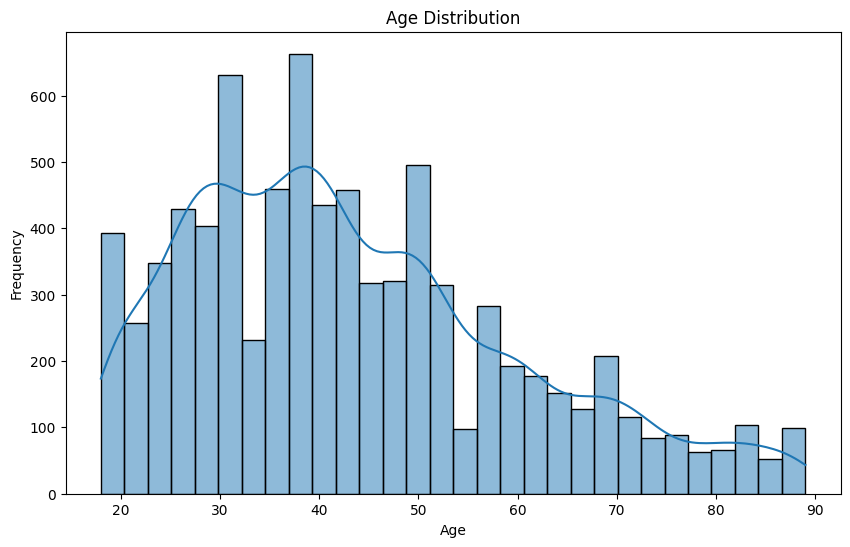

In [4]:
# Basic statistical summary
train_df.describe()

# Check for missing values
train_df.isnull().sum()

# Example of visualization
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [16]:
# Reemplazar con la media de Work_Experience
train_df['Work_Experience'].fillna(train_df['Work_Experience'].mean(), inplace=True)


<ipython-input-16-f5c293e3c94e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Work_Experience'].fillna(train_df['Work_Experience'].mean(), inplace=True)


In [17]:
# Check and fill NaN values for other features used in clustering
# Replace 'mean' with other strategies like 'median' if appropriate
for column in ['Age', 'Family_Size']:
    train_df[column].fillna(train_df[column].mean(), inplace=True)

<ipython-input-17-4c8c9b9b88ff>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[column].fillna(train_df[column].mean(), inplace=True)


#8. Data Preprocessing

In [18]:
# Select features for clustering
features = ['Age', 'Family_Size', 'Work_Experience']
X = train_df[features]

In [19]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#9. Dimensionality Reduction with PCA

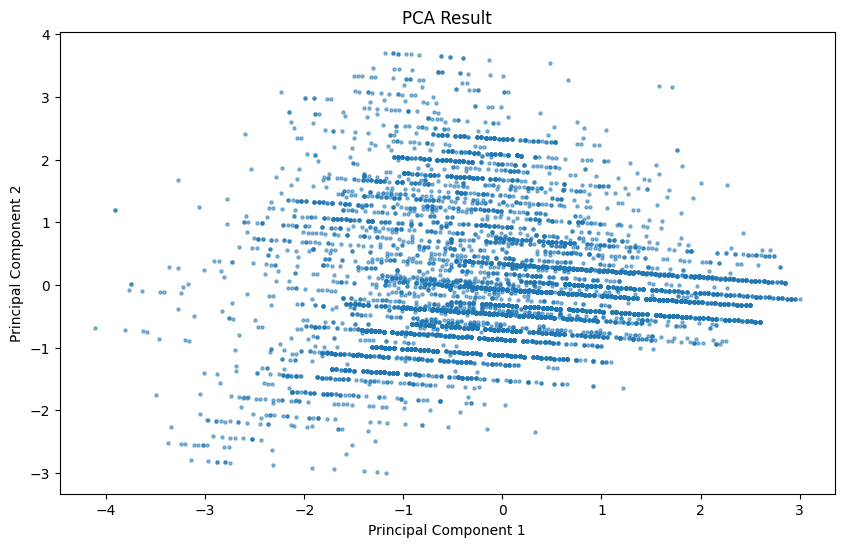

In [20]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the PCA result
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=5, alpha=0.5)
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#10. Clustering with K-means

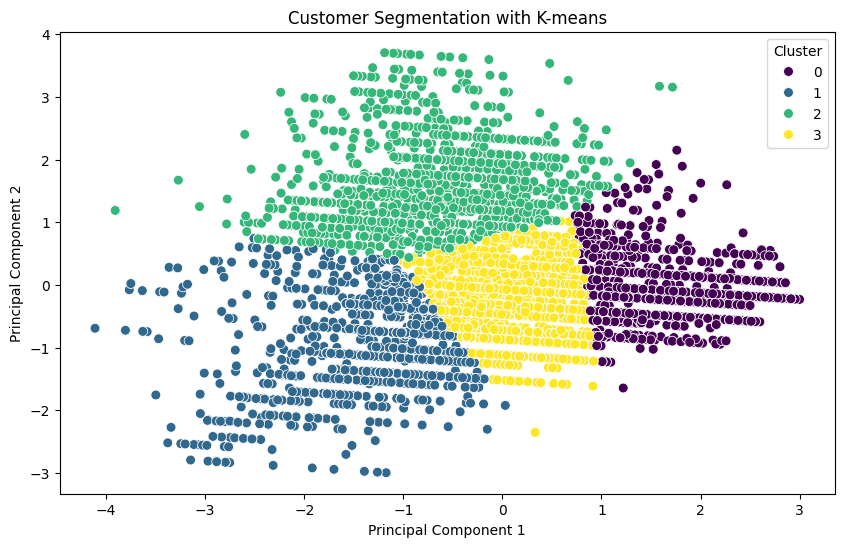

In [21]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4)  # Adjust number of clusters as needed
clusters = kmeans.fit_predict(X_pca)

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', s=50)
plt.title('Customer Segmentation with K-means')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

#11 Competences Acquired
- **Clustering and Dimensionality Reduction**: Implementation of K-means and PCA to effectively segment customers.
- **Cluster Visualization**: Visual representation of clusters using reduced dimensions for clearer interpretation.
